# Exploring the NCI-DREAM dataset

## imports

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
datadir = "/Volumes/OXYTOCIN/datasets/nci-dream/DrugSensitivity1"
drug_sensitivity_fname = "Drug_Response_Training.txt"
predictions_fname = "Predictions.csv"
gene_expr_fname = "GeneExpression.txt"
rnaseq_fname = "RNAseq_quantification.txt"

## submission file

In [11]:
predictions = pd.read_csv(f"{datadir}/{predictions_fname}")

In [14]:
all_cell_lines = list(predictions["DrugAnonID"])
print(len(all_cell_lines))

53


## drug sensitivity (GI50) target data

In [16]:
drug_sensitivity = pd.read_csv(f"{datadir}/{drug_sensitivity_fname}", sep="\t")

In [48]:
training_cell_lines = list(drug_sensitivity["CellLine"])
print(len(training_cell_lines))

35


In [59]:
test_cell_lines = list(set(all_cell_lines) - set(training_cell_lines))
print(len(test_cell_lines))

18


In [61]:
# calculate drug sensitivity distributions
# min = least effective
# max = most effective
drug_sensitivity_stats = drug_sensitivity.describe()
for i in range(1, 32):
    print(drug_sensitivity_stats[f"Drug{i}"])
    print()

count    30.000000
mean      4.891033
std       0.475655
min       3.777000
25%       4.718000
50%       4.901500
75%       5.101500
max       6.432000
Name: Drug1, dtype: float64

count    30.000000
mean      4.941733
std       0.445811
min       3.777000
25%       4.732500
50%       4.963000
75%       5.215500
max       6.180000
Name: Drug2, dtype: float64

count    34.000000
mean      4.288912
std       0.315926
min       3.777000
25%       4.070000
50%       4.312000
75%       4.455500
max       4.939000
Name: Drug3, dtype: float64

count    20.000000
mean      7.054700
std       0.385391
min       6.421000
25%       6.830750
50%       7.084500
75%       7.334750
max       7.879000
Name: Drug4, dtype: float64

count    33.000000
mean      6.165788
std       0.010271
min       6.164000
25%       6.164000
50%       6.164000
75%       6.164000
max       6.223000
Name: Drug5, dtype: float64

count    16.000000
mean      5.119500
std       0.302155
min       4.863000
25%       4.887250


In [91]:
drug_sensitivity.max(axis=1).max(), drug_sensitivity.min(axis=1).min(), len(drug_sensitivity)

/var/folders/7w/41msfz292s3ff286j1sghb500000gn/T/ipykernel_92981/2709860673.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  drug_sensitivity.max(axis=1).max(), drug_sensitivity.min(axis=1).min(), len(drug_sensitivity)


(9.833, 2.16, 35)

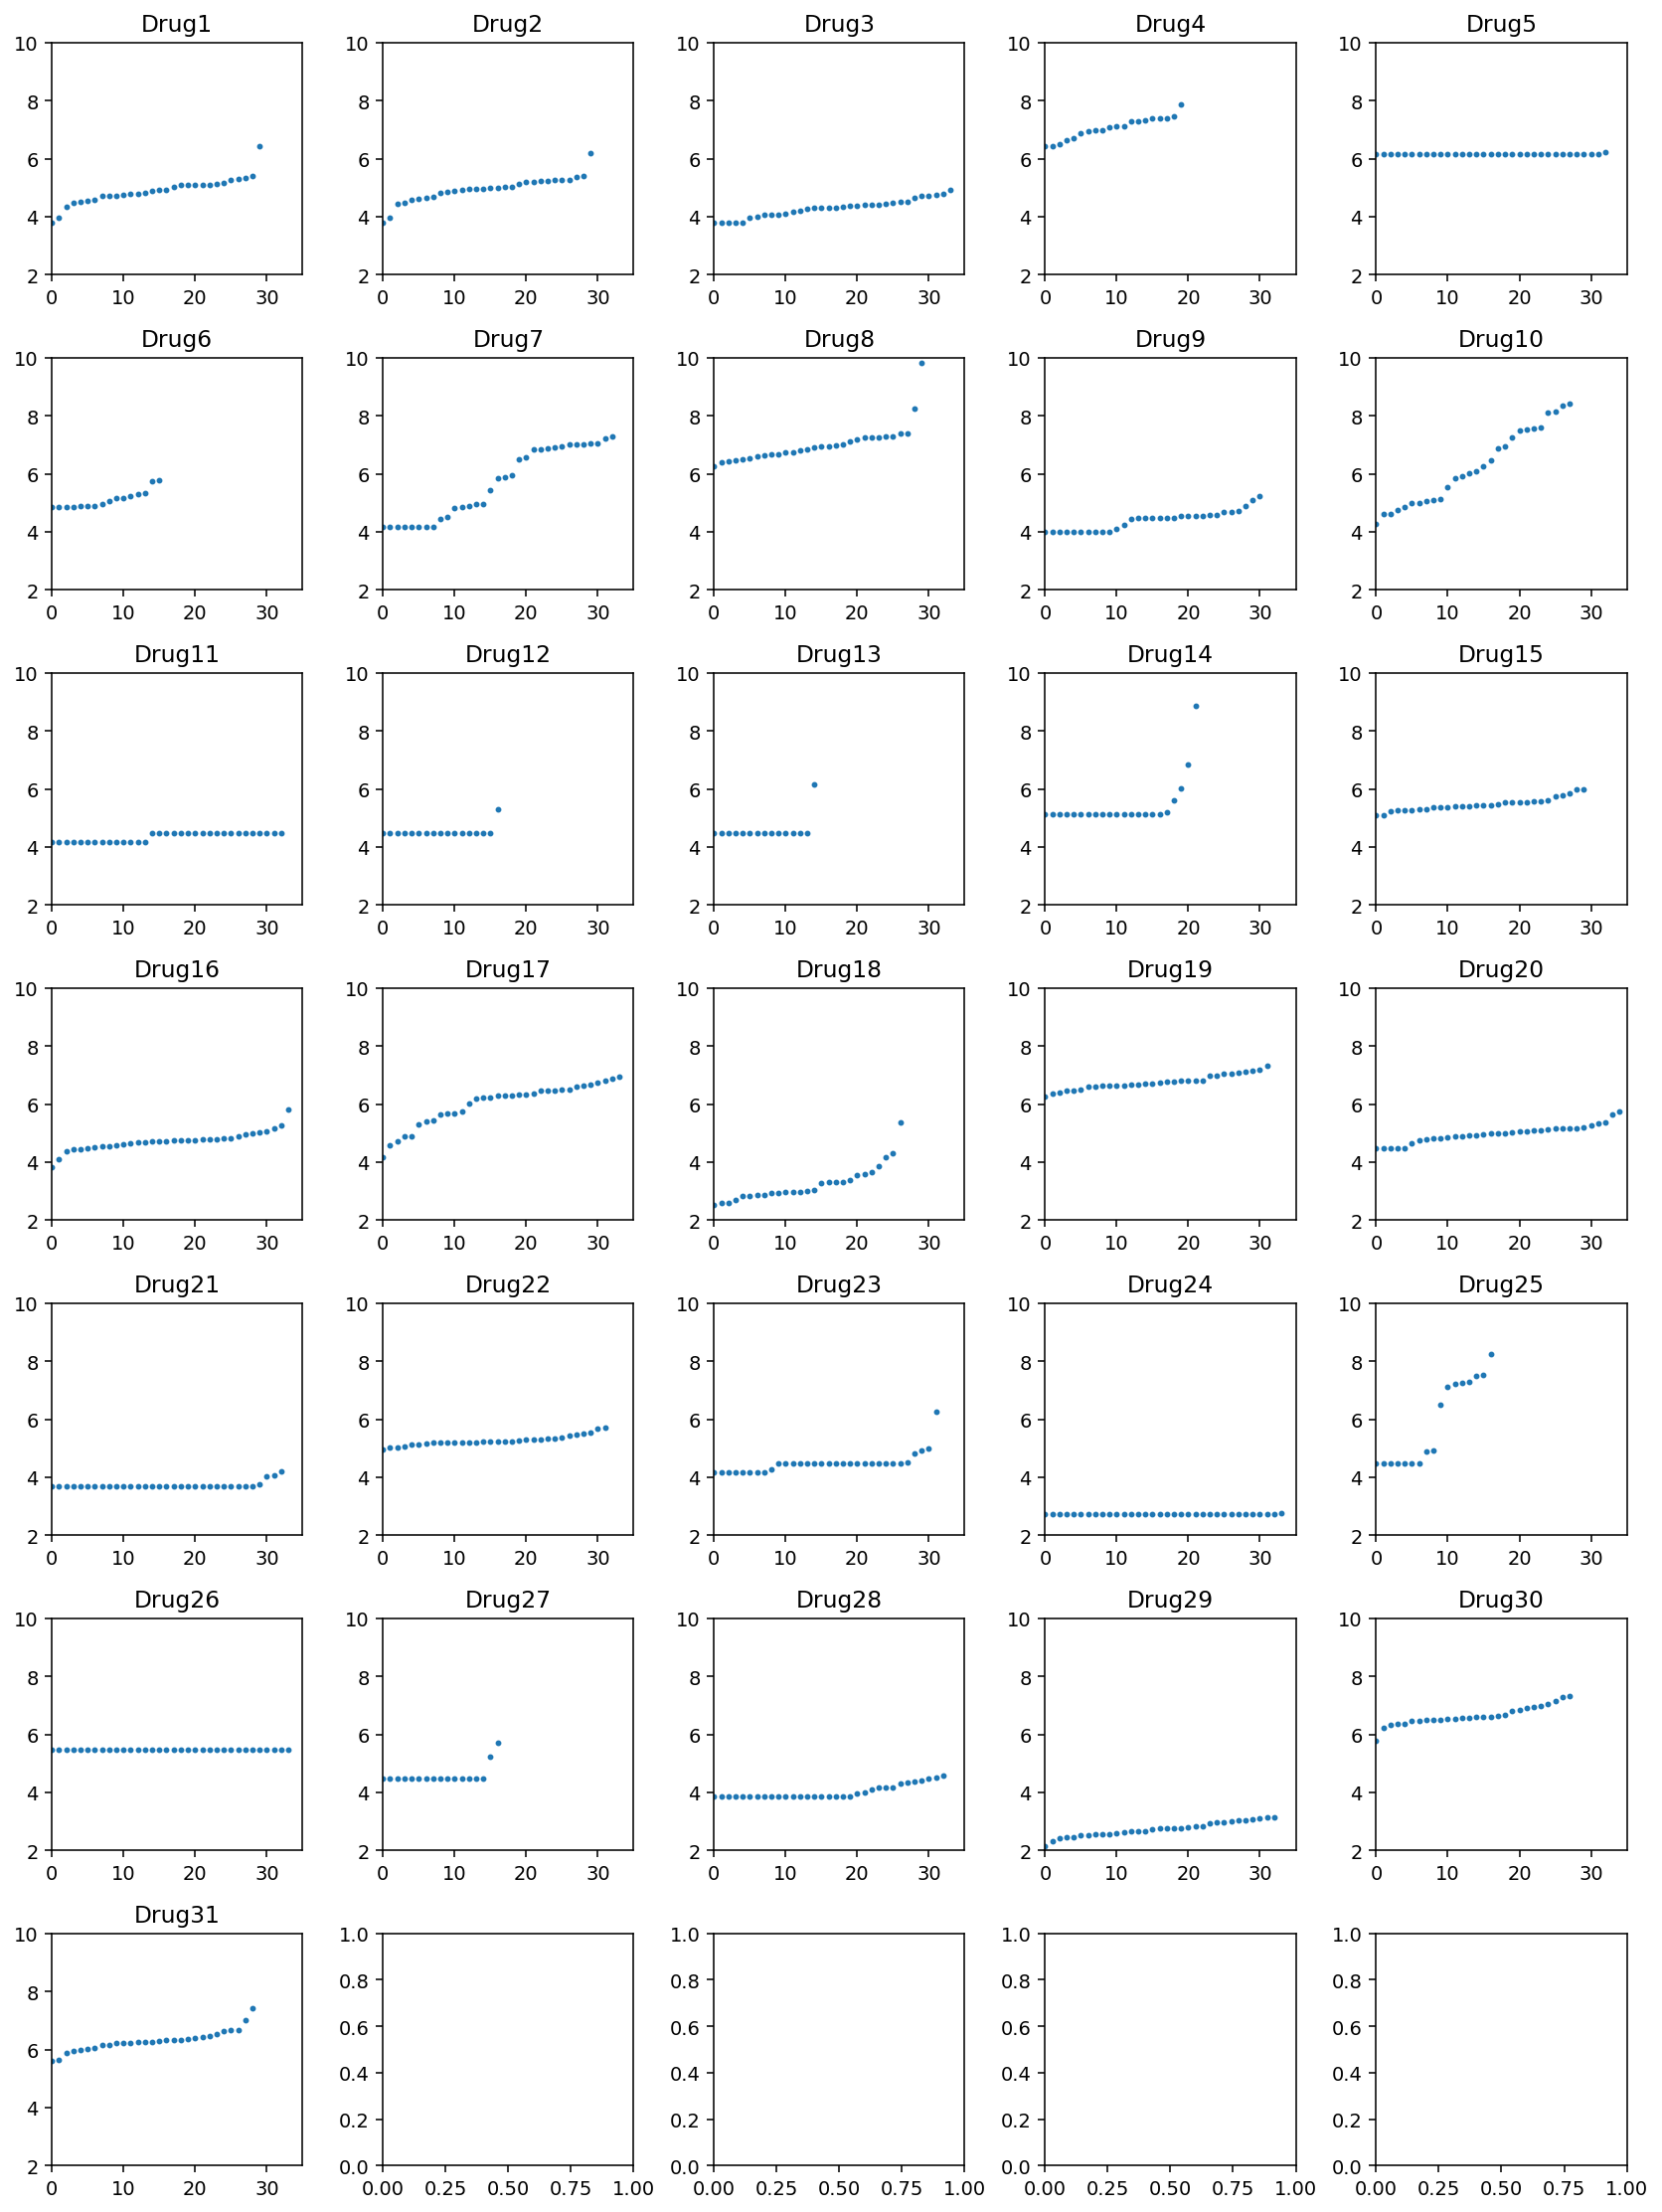

In [97]:
# plot drug sensitivity distributions
fig, axes = plt.subplots(7, 5, figsize=(12, 16), dpi=140)

for drug_idx in range(31):
    ax = axes[drug_idx // 5, drug_idx % 5]
    drug_id = f"Drug{drug_idx + 1}"
    sensitivity = drug_sensitivity[drug_id].dropna()
    x = range(len(sensitivity))
    y = sorted(sensitivity)
    
    ax.scatter(x, y, s=4)
    ax.set_xlim(0, 35)
    ax.set_ylim(2, 10)
    
    ax.set_title(drug_id)
    
fig.tight_layout()

In [62]:
drug_sensitivity["Drug5"]

0     6.223
1     6.164
2     6.164
3     6.164
4       NaN
5     6.164
6     6.164
7     6.164
8     6.164
9     6.164
10    6.164
11    6.164
12    6.164
13    6.164
14      NaN
15    6.164
16    6.164
17    6.164
18    6.164
19    6.164
20    6.164
21    6.164
22    6.164
23    6.164
24    6.164
25    6.164
26    6.164
27    6.164
28    6.164
29    6.164
30    6.164
31    6.164
32    6.164
33    6.164
34    6.164
Name: Drug5, dtype: float64

## gene expression data

In [5]:
gene_expr = pd.read_csv(f"{datadir}/{gene_expr_fname}", sep="\t")

In [22]:
gene_expr_cell_lines = set(gene_expr.columns) - {"HGNC_ID"}

In [28]:
for cell_line in test_cell_lines:
    if cell_line not in gene_expr_cell_lines:
        print(cell_line)

21NT
MX1
21MT1
184A1


In [52]:
len(gene_expr), len(gene_expr_cell_lines)
# 18632 genes, 46 cell lines

(18632, 46)

In [53]:
gene_expr

,HGNC_ID,184B5,600MPE,AU565,BT20,BT474,BT483,CAMA1,HCC38,HCC70,...,SUM185PE,SUM225CWN,SUM1315MO2,T47D,UACC812,ZR751,ZR7530,ZR75B,BT549,MCF10A
0,C9orf152,3.613030,8.463736,7.935823,3.098928,9.010836,6.238427,7.531960,2.941374,5.048602,...,8.611076,7.479183,2.743167,7.885278,6.478226,9.306710,7.672073,9.016769,3.312954,3.257463
1,ELMO2,7.205940,7.959597,8.073369,8.164778,8.120015,8.950747,7.747369,8.551765,7.708224,...,9.391230,8.086427,7.653533,8.027774,8.112902,8.274168,8.654507,7.907656,8.463506,7.348165
2,RPS11,10.476276,9.939852,9.817430,10.038500,9.533423,9.471906,9.889735,9.852145,9.496845,...,9.025056,9.624821,9.447288,8.779309,9.069048,9.333409,9.360958,10.064785,9.693886,9.858231
3,CREB3L1,5.565989,9.835957,5.696639,4.972852,8.155372,6.437281,6.572890,7.007242,5.386509,...,9.897796,8.059426,7.569412,5.437983,8.168436,7.360383,8.892531,7.051816,7.973954,5.256000
4,PNMA1,7.664038,7.645439,7.761882,7.766212,8.393242,8.081416,7.643172,7.922658,7.409595,...,7.985742,7.395009,8.757817,8.315187,8.430294,7.001755,7.582231,7.348228,8.558804,7.668157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18627,PIK3IP1,5.094983,5.838762,5.259975,4.581164,6.680903,5.298018,6.048598,4.799027,6.513449,...,5.634955,6.772698,4.818312,5.567047,6.071105,7.162297,7.118008,6.037431,5.063114,4.605722
18628,SNRPD2,8.347877,8.134302,8.465382,8.861059,8.264550,7.961019,8.638154,9.104285,8.273480,...,7.709004,8.019798,8.530214,8.133355,8.620167,8.298169,7.933501,8.802854,8.630818,8.539019
18629,SLC39A6,9.560331,9.230374,8.702158,6.829949,9.895278,11.069736,9.445905,9.809352,7.975159,...,8.164757,7.942354,7.667108,8.665270,9.854913,9.958577,8.303573,12.605733,9.136941,8.826168
18630,CTSC,8.014001,5.489988,6.926434,6.706568,4.959705,5.299012,5.410741,8.671523,7.534491,...,4.963450,6.609082,5.914920,5.701576,5.371800,5.915521,4.797568,5.569548,7.787072,8.315306


## rnaseq data

In [32]:
rnaseq = pd.read_csv(f"{datadir}/{rnaseq_fname}", sep="\t")

In [36]:
rnaseq.columns

Index(['HGNC_ID', 'Ensembl_ID', '184A1', '184B5', '21MT1', '21NT', '600MPE',
       'AU565', 'BT474', 'BT483', 'BT549', 'CAMA1', 'HCC1143', 'HCC1395',
       'HCC1419', 'HCC1428', 'HCC1569', 'HCC1806', 'HCC1937', 'HCC1954',
       'HCC202', 'HCC3153', 'HCC38', 'HCC70', 'HS578T', 'LY2', 'MCF10A',
       'MCF10F', 'MCF12A', 'MCF7', 'MDAMB175VII', 'MDAMB231', 'MDAMB361',
       'MDAMB453', 'MX1', 'SKBR3', 'SUM149PT', 'SUM159PT', 'SUM225CWN',
       'SUM229PE', 'SUM52PE', 'T47D', 'UACC812', 'ZR751', 'ZR7530', 'ZR75B'],
      dtype='object')

In [39]:
rnaseq_cell_lines = set(rnaseq.columns) - {"HGNC_ID", "Ensembl_ID"}
print(len(rnaseq_cell_lines))

44


In [40]:
for cell_line in test_cell_lines:
    if cell_line not in rnaseq_cell_lines:
        print(cell_line)

SUM1315MO2
HCC2185
SUM185PE


In [47]:
set(training_cell_lines) - (rnaseq_cell_lines | gene_expr_cell_lines)

NameError: name 'training_cell_lines' is not defined